In [17]:
from autograd import grad 
from autograd import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

# libraries
from autograd import numpy as np

# import the dataset
# set path to datasets
datapath = '/home/jingyan/Documents/eecs475/final_project/datasets/'


csvname =datapath + 'diabetic_data_no_header.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
# x = data[:,:-2]# x is a 10*95234 matrix
x = (data[:,:-1]).T

y = data[:,-1]# y is 95234*1 matrix
y =np.reshape(y,(1,len(y)))

num_sample = 5000
inds = np.random.permutation(y.size)[:num_sample]
x_sample = x[:,inds]
y_sample = y[:,inds]

x=x_sample[2:4,:]
y=y_sample

def feature_transforms_1(x,w):
    # calculate feature transform
    f = np.sin(w[0] + np.dot(x.T,w[1:])).T
    return f

def feature_transforms_2(x,w):
    # calculate feature transform
    f = np.cos(w[0] + np.dot(x.T,w[1:])).T
    return f

def model(x,w):
    # feature transformation 
    f_1 = feature_transforms_1(x,w[:,0:2])
    f_2 = feature_transforms_2(x,w[:,2:4])
    # compute linear combination and return
    
    a = w[:,4][0] + np.dot(f_1.T,w[:,4][1:]) + w[:,5][0] + np.dot(f_2.T,w[:,5][1:])
    return a.T
def sigmoid (t):
    return 2*(1/(1 + np.exp(-t)))-1

def perceptron(w,y):
    
    cost = np.sum(np.maximum(0,-y*model(x,w)))
    return cost/float(np.size(y))

def gradient_descent(g,alpha,max_its,w,y):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w,y)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w,y)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w,y))
    return weight_history,cost_history

    # cost function history plotter
def changeY (y,n):
    temp = np.full((1,np.size(y)),-1.0)
    for i in range(np.size(y)):
        if(y[0][i] == n):
            temp[0][i] = 1.0
    return temp



In [51]:
w = np.random.randn(3,6)
weight_history,cost_history=gradient_descent(perceptron,5e-5,1000,w,y1)

#     print(cost_history[-10:])
wo=weight_history[-1]

In [52]:
actual_data=y1[0]
model_data=np.sign(model(x,wo))
model_data=np.reshape(model_data,(np.size(model_data)))
misclass=0
for i in range(np.size(model_data)):
    if actual_data[i] != model_data[i]:
        misclass=misclass+1
print(misclass)

2479


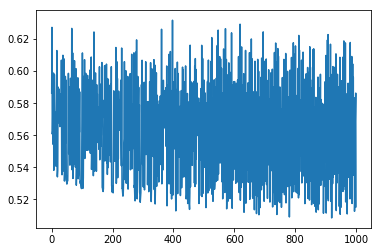

[0.5961833240358871, 0.5472666967951927, 0.5720197457895161, 0.5833080644864276, 0.512602106254573, 0.5190390782777002, 0.5637430507035436, 0.5771076172702595, 0.5862769230833065, 0.5154388415149757]


In [53]:
plt.plot(cost_history)
plt.show()
print(cost_history[-10:])

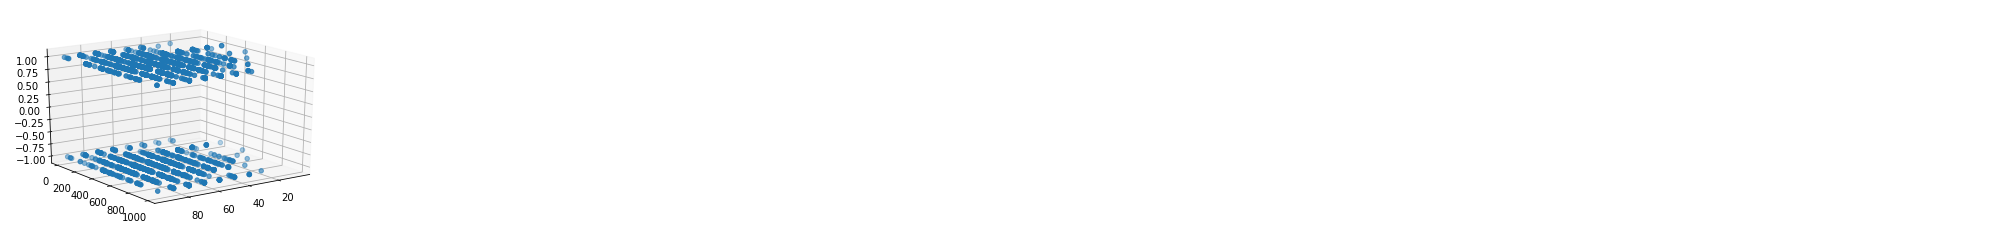

In [55]:
plt3d=plt.figure().gca(projection='3d')
plt3d.view_init(20,55)
# plt3d.plot_surface(x1,x2,yo,alpha=0.2,color='r')
plt3d.scatter(x[0], x[1], y1,'ro')
plt.show()

In [50]:
np.unique(y1)

array([-1.,  1.])

In [13]:
y1 = changeY(y,0) 

In [25]:
y1.shape

(1, 5000)